In [1]:
from func_def import *
df = pd.read_csv('data_pre_processed.csv',index_col=[0]).reset_index(drop=True)
df.date = pd.to_datetime(df.date)
df = df[(df.result=='W')|(df.result=='L')].sort_values(by='date',ascending=False).reset_index(drop=True)
df.head(5)

,url,event_url,date,result,fighter,opponent,title,method,round,time,format,f_head_str,f_body_str,f_leg_str,f_distance_str,f_clinch_str,f_ground_str,o_head_str,o_body_str,o_leg_str,o_distance_str,o_clinch_str,o_ground_str,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc
0,http://www.ufcstats.com/fight-details/824859c7...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,L,Sodiq Yusuff,Edson Barboza,Featherweight Bout,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),126of284,14of20,38of47,148of311,15of18,15of22,71of204,89of112,4of8,134of290,25of27,5of7,0.70,0.07,0.21,0.83,0.08,0.08,0.43,0.54,0.02,0.81,0.15,0.03
1,http://www.ufcstats.com/fight-details/751cf3d5...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,L,Jennifer Mai,Viviane Araujo,Women's Flyweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),29of87,2of4,10of10,31of88,10of13,0of0,15of36,4of5,5of5,22of43,1of2,1of1,0.70,0.04,0.24,0.75,0.24,0.00,0.62,0.16,0.20,0.91,0.04,0.04
2,http://www.ufcstats.com/fight-details/0d6d212f...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Jonathan Martinez,Adrian Yane,Bantamweight Bout,KO/TKO,2,2:26,3 Rnd (5-5-5),7of15,0of2,29of41,36of58,0of0,0of0,9of59,10of12,1of1,17of66,3of6,0of0,0.19,0.00,0.80,1.00,0.00,0.00,0.45,0.50,0.05,0.85,0.15,0.00
3,http://www.ufcstats.com/fight-details/6acd1c59...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,L,Andre Petrosk,Michel Pereira,Middleweight Bout,KO/TKO,1,1:06,3 Rnd (5-5-5),0of1,0of0,0of0,0of1,0of0,0of0,5of17,1of1,0of0,2of6,0of0,4of12,0.33,0.34,0.33,0.33,0.34,0.33,0.83,0.16,0.00,0.33,0.00,0.66
4,http://www.ufcstats.com/fight-details/0197a614...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Christian Rodrigue,Cameron Saaiman,Bantamweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),64of141,18of19,1of1,63of131,13of21,7of9,38of121,14of21,21of33,65of160,8of15,0of0,0.77,0.21,0.01,0.75,0.15,0.08,0.52,0.19,0.28,0.89,0.10,0.00


In [2]:
# Cleaning the data:
print(f'Previous fight formats:\n{df.format.value_counts()}\n')
df = df[(df.format == '3 Rnd (5-5-5)')|(df.format == '5 Rnd (5-5-5-5-5)')].reset_index(drop=True)
print(f'Current fight formats:\n{df.format.value_counts()}')

df.rename(columns={'format':'rounds'}, inplace=True)
df['rounds'] = [3 if item == '3 Rnd (5-5-5)' else 5 for item in df.rounds ]
df.head(3)

Previous fight formats:
3 Rnd (5-5-5)           6370
5 Rnd (5-5-5-5-5)        629
1 Rnd + OT (12-3)         46
3 Rnd + OT (5-5-5-5)      31
No Time Limit             21
2 Rnd (5-5)               11
1 Rnd + 2OT (15-3-3)       9
1 Rnd (20)                 8
1 Rnd (12)                 3
1 Rnd + 2OT (24-3-3)       1
1 Rnd (30)                 1
Name: format, dtype: int64

Current fight formats:
3 Rnd (5-5-5)        6370
5 Rnd (5-5-5-5-5)     629
Name: format, dtype: int64


,url,event_url,date,result,fighter,opponent,title,method,round,time,rounds,f_head_str,f_body_str,f_leg_str,f_distance_str,f_clinch_str,f_ground_str,o_head_str,o_body_str,o_leg_str,o_distance_str,o_clinch_str,o_ground_str,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc
0,http://www.ufcstats.com/fight-details/824859c7...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,L,Sodiq Yusuff,Edson Barboza,Featherweight Bout,Decision - Unanimous,5,5:00,5,126of284,14of20,38of47,148of311,15of18,15of22,71of204,89of112,4of8,134of290,25of27,5of7,0.70,0.07,0.21,0.83,0.08,0.08,0.43,0.54,0.02,0.81,0.15,0.03
1,http://www.ufcstats.com/fight-details/751cf3d5...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,L,Jennifer Mai,Viviane Araujo,Women's Flyweight Bout,Decision - Unanimous,3,5:00,3,29of87,2of4,10of10,31of88,10of13,0of0,15of36,4of5,5of5,22of43,1of2,1of1,0.70,0.04,0.24,0.75,0.24,0.00,0.62,0.16,0.20,0.91,0.04,0.04
2,http://www.ufcstats.com/fight-details/0d6d212f...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Jonathan Martinez,Adrian Yane,Bantamweight Bout,KO/TKO,2,2:26,3,7of15,0of2,29of41,36of58,0of0,0of0,9of59,10of12,1of1,17of66,3of6,0of0,0.19,0.00,0.80,1.00,0.00,0.00,0.45,0.50,0.05,0.85,0.15,0.00


In [3]:
df.result.value_counts()

W    4532
L    2467
Name: result, dtype: int64

In [4]:
# balance W + L amounts for unbiased model
for i in tqdm(df.index):
    if random() > 0.5:
        df.loc[i] = get_switched_row(index=i,data=df)

df.result.value_counts()        

100%|██████████| 6999/6999 [00:22<00:00, 317.04it/s]


W    3562
L    3437
Name: result, dtype: int64

In [5]:
# data enrichements 
NEW_DATA_COLUMNS = ['win_perc','win_streak']
df['f_win_streak'] = [get_streak(df.loc[i,'fighter'],df,df.loc[i,'date']) for i in tqdm(df.index)]
df['o_win_streak'] = [get_streak(df.loc[i,'opponent'],df,df.loc[i,'date']) for i in tqdm(df.index)]

df.head(3)       

100%|██████████| 6999/6999 [02:19<00:00, 50.27it/s] 


,url,event_url,date,result,fighter,opponent,title,method,round,time,rounds,f_head_str,f_body_str,f_leg_str,f_distance_str,f_clinch_str,f_ground_str,o_head_str,o_body_str,o_leg_str,o_distance_str,o_clinch_str,o_ground_str,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_win_streak,o_win_streak
0,http://www.ufcstats.com/fight-details/824859c7...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,L,Sodiq Yusuff,Edson Barboza,Featherweight Bout,Decision - Unanimous,5,5:00,5,126of284,14of20,38of47,148of311,15of18,15of22,71of204,89of112,4of8,134of290,25of27,5of7,0.70,0.07,0.21,0.83,0.08,0.08,0.43,0.54,0.02,0.81,0.15,0.03,2,1
1,http://www.ufcstats.com/fight-details/751cf3d5...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Viviane Araujo,Jennifer Mai,Women's Flyweight Bout,Decision - Unanimous,3,5:00,3,15of36,4of5,5of5,22of43,1of2,1of1,29of87,2of4,10of10,31of88,10of13,0of0,0.62,0.16,0.20,0.91,0.04,0.04,0.70,0.04,0.24,0.75,0.24,0.00,-2,2
2,http://www.ufcstats.com/fight-details/0d6d212f...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Jonathan Martinez,Adrian Yane,Bantamweight Bout,KO/TKO,2,2:26,3,7of15,0of2,29of41,36of58,0of0,0of0,9of59,10of12,1of1,17of66,3of6,0of0,0.19,0.00,0.80,1.00,0.00,0.00,0.45,0.50,0.05,0.85,0.15,0.00,5,-1


In [9]:
# Extract features
FEATURES = [item[item.find('_')+1:] for item in df.columns if 'f_' in item]

FULL_FEATURE_NAME = [f'f_{item}' for item in FEATURES] + [f'o_{item}' for item in FEATURES]
print(f'Constructing Features: {FEATURES}')

drop_columns = []
for column in FULL_FEATURE_NAME:
    if type(df.loc[0,column]) == str:
        drop_columns.append(column)
        df[f'{column}_succ'] = pd.to_numeric([item.split('of')[0] for item in df[column]])
        df[f'{column}_att'] = pd.to_numeric([item.split('of')[1] for item in df[column]])

df = df[[column for column in df.columns if column not in drop_columns]]
df.head(3)

Constructing Features: ['head_str_perc', 'body_str_perc', 'leg_str_perc', 'dist_str_perc', 'clinch_str_perc', 'ground_str_perc', 'win_streak', 'head_str_succ', 'head_str_att', 'body_str_succ', 'body_str_att', 'leg_str_succ', 'leg_str_att', 'distance_str_succ', 'distance_str_att', 'clinch_str_succ', 'clinch_str_att', 'ground_str_succ', 'ground_str_att']


,url,event_url,date,result,fighter,opponent,title,method,round,time,rounds,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_win_streak,o_win_streak,f_head_str_succ,f_head_str_att,f_body_str_succ,f_body_str_att,f_leg_str_succ,f_leg_str_att,f_distance_str_succ,f_distance_str_att,f_clinch_str_succ,f_clinch_str_att,f_ground_str_succ,f_ground_str_att,o_head_str_succ,o_head_str_att,o_body_str_succ,o_body_str_att,o_leg_str_succ,o_leg_str_att,o_distance_str_succ,o_distance_str_att,o_clinch_str_succ,o_clinch_str_att,o_ground_str_succ,o_ground_str_att
0,http://www.ufcstats.com/fight-details/824859c7...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,L,Sodiq Yusuff,Edson Barboza,Featherweight Bout,Decision - Unanimous,5,5:00,5,0.70,0.07,0.21,0.83,0.08,0.08,0.43,0.54,0.02,0.81,0.15,0.03,2,1,126,284,14,20,38,47,148,311,15,18,15,22,71,204,89,112,4,8,134,290,25,27,5,7
1,http://www.ufcstats.com/fight-details/751cf3d5...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Viviane Araujo,Jennifer Mai,Women's Flyweight Bout,Decision - Unanimous,3,5:00,3,0.62,0.16,0.20,0.91,0.04,0.04,0.70,0.04,0.24,0.75,0.24,0.00,-2,2,15,36,4,5,5,5,22,43,1,2,1,1,29,87,2,4,10,10,31,88,10,13,0,0
2,http://www.ufcstats.com/fight-details/0d6d212f...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Jonathan Martinez,Adrian Yane,Bantamweight Bout,KO/TKO,2,2:26,3,0.19,0.00,0.80,1.00,0.00,0.00,0.45,0.50,0.05,0.85,0.15,0.00,5,-1,7,15,0,2,29,41,36,58,0,0,0,0,9,59,10,12,1,1,17,66,3,6,0,0


<AxesSubplot:xlabel='result', ylabel='f_head_str_att'>

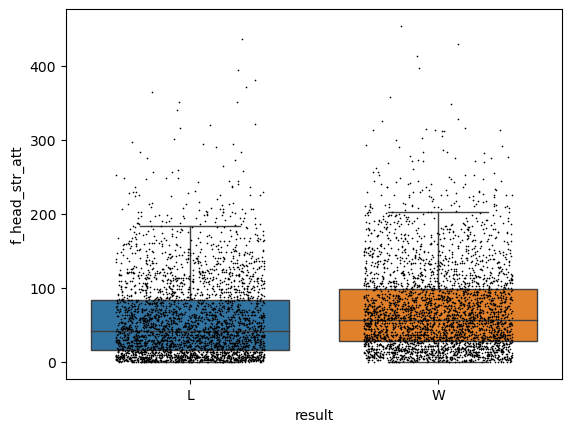

In [10]:
# Visualize STAT effect:
SELECTED_FEATURE = 'f_head_str_att'
sns.boxplot(x='result',y=SELECTED_FEATURE,data=df,linewidth=1,fliersize=0)
sns.stripplot(x='result',y=SELECTED_FEATURE,data=df,size=1.2,jitter=0.3,color='black')

In [11]:
df.to_csv('data_processed.csv',index=None)
print('data_processed.csv saved.')
df.head()

data_processed.csv saved.


,url,event_url,date,result,fighter,opponent,title,method,round,time,rounds,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_win_streak,o_win_streak,f_head_str_succ,f_head_str_att,f_body_str_succ,f_body_str_att,f_leg_str_succ,f_leg_str_att,f_distance_str_succ,f_distance_str_att,f_clinch_str_succ,f_clinch_str_att,f_ground_str_succ,f_ground_str_att,o_head_str_succ,o_head_str_att,o_body_str_succ,o_body_str_att,o_leg_str_succ,o_leg_str_att,o_distance_str_succ,o_distance_str_att,o_clinch_str_succ,o_clinch_str_att,o_ground_str_succ,o_ground_str_att
0,http://www.ufcstats.com/fight-details/824859c7...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,L,Sodiq Yusuff,Edson Barboza,Featherweight Bout,Decision - Unanimous,5,5:00,5,0.70,0.07,0.21,0.83,0.08,0.08,0.43,0.54,0.02,0.81,0.15,0.03,2,1,126,284,14,20,38,47,148,311,15,18,15,22,71,204,89,112,4,8,134,290,25,27,5,7
1,http://www.ufcstats.com/fight-details/751cf3d5...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Viviane Araujo,Jennifer Mai,Women's Flyweight Bout,Decision - Unanimous,3,5:00,3,0.62,0.16,0.20,0.91,0.04,0.04,0.70,0.04,0.24,0.75,0.24,0.00,-2,2,15,36,4,5,5,5,22,43,1,2,1,1,29,87,2,4,10,10,31,88,10,13,0,0
2,http://www.ufcstats.com/fight-details/0d6d212f...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Jonathan Martinez,Adrian Yane,Bantamweight Bout,KO/TKO,2,2:26,3,0.19,0.00,0.80,1.00,0.00,0.00,0.45,0.50,0.05,0.85,0.15,0.00,5,-1,7,15,0,2,29,41,36,58,0,0,0,0,9,59,10,12,1,1,17,66,3,6,0,0
3,http://www.ufcstats.com/fight-details/6acd1c59...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Michel Pereira,Andre Petrosk,Middleweight Bout,KO/TKO,1,1:06,3,0.83,0.16,0.00,0.33,0.00,0.66,0.33,0.34,0.33,0.33,0.34,0.33,5,5,5,17,1,1,0,0,2,6,0,0,4,12,0,1,0,0,0,0,0,1,0,0,0,0
4,http://www.ufcstats.com/fight-details/0197a614...,http://www.ufcstats.com/event-details/f3a07827...,2023-10-14,W,Christian Rodrigue,Cameron Saaiman,Bantamweight Bout,Decision - Unanimous,3,5:00,3,0.77,0.21,0.01,0.75,0.15,0.08,0.52,0.19,0.28,0.89,0.10,0.00,2,3,64,141,18,19,1,1,63,131,13,21,7,9,38,121,14,21,21,33,65,160,8,15,0,0
